In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/Users/golnooshteymoori/Downloads/movies 2.csv')

In [4]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [17]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [15]:
# for missing data
for col in df.columns:
    missing_data=np.mean(df[col].isnull())
    print('{} -{}%'.format(col,missing_data))
    


name -0.0%
rating -0.010041731872717789%
genre -0.0%
year -0.0%
released -0.0002608242044861763%
score -0.0003912363067292645%
votes -0.0003912363067292645%
director -0.0%
writer -0.0003912363067292645%
star -0.00013041210224308815%
country -0.0003912363067292645%
budget -0.2831246739697444%
gross -0.02464788732394366%
company -0.002217005738132499%
runtime -0.0005216484089723526%


In [19]:
# for columns dtypes
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [24]:
df=df.dropna()

In [82]:
# change the data type for some columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0         2009  
7445  1470       47  356000000  2797501328      983    181.0         2019  
3045  1073       47  200000000  2201647264     1382    194.0         1997  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018

In [44]:
# Correct the realeased year
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

name     rating      genre  year  \
8                          Superman II         PG     Action  1980   
11              The Gods Must Be Crazy         PG  Adventure  1980   
21                       Heaven's Gate          R  Adventure  1980   
33    Cattle Annie and Little Britches         PG      Drama  1980   
96                       The Evil Dead      NC-17     Horror  1981   
...                                ...        ...        ...   ...   
7427                      Stan & Ollie         PG  Biography  2018   
7432          Dragon Ball Super: Broly         PG  Animation  2018   
7462                              1917          R      Drama  2019   
7525               Weathering with You      PG-13  Animation  2019   
7604                            Mine 9  Not Rated      Drama  2019   

                               released  score     votes          director  \
8         June 19, 1981 (United States)    6.8  101000.0    Richard Lester   
11     October 26, 1984 (United States)    7.3   54000.0         Jamie Uys   
21       April 24, 1981 (United States)    6.8   14000.0    Michael Cimino   
33       April 24, 1981 (United States)    6.1     604.0    Lamont Johnson   
96       April 15, 1983 (United States)    7.5  192000.0         Sam Raimi   
...                                 ...    ...       ...               ...   
7427  January 11, 2019 (United Kingdom)    7.2   34000.0      Jon S. Baird   
7432   January 16, 2019 (United States)    7.8   24000.0  Tatsuya Nagamine   
7462   January 10, 2020 (United States)    8.3  473000.0        Sam Mendes   
7525   January 17, 2020 (United States)    7.5   28000.0    Makoto Shinkai   
7604              May 19, 2020 (Poland)    6.4    4400.0     Eddie Mensore   

              writer                  star         country    budget  \
8       Jerry Siegel          Gene Hackman   United States  54000000   
11         Jamie Uys                 N!xau    South Africa   5000000   
21    Michael Cimino    Kris Kristofferson   United States  44000000   
33        David Eyre           Scott Glenn   United States   5100000   
96         Sam Raimi        Bruce Campbell   United States    350000   
...              ...                   ...             ...       ...   
7427       Jeff Pope          Steve Coogan  United Kingdom  10000000   
7432  Akira Toriyama         Masako Nozawa           Japan   8500000   
7462      Sam Mendes  Dean-Charles Chapman   United States  95000000   
7525  Makoto Shinkai          Kotaro Daigo           Japan  11100000   
7604   Eddie Mensore         Terry Serpico   United States    350000   

          gross                              company  runtime  yearcorrect  
8     108185706                       Dovemead Films    127.0         1981  
11     30031783                         C.A.T. Films    109.0         1984  
21      3484523                 Partisan Productions    219.0         1981  
33       534816             Cattle Annie Productions     97.0         1981  
96      2956630                 Renaissance Pictures     85.0         1983  
...         ...                                  ...      ...          ...  
7427   24420923                    Entertainment One     98.0         2019  
7432  115757940                         Toei Company    100.0         2019  
7462  384623579                  Dreamworks Pictures    119.0         2020  
7525  193457467  "Weathering With You" Film Partners    112.0         2020  
7604     226421                       Emphatic Films     83.0         2020  

[708 rows x 16 columns]

In [63]:
# Sort values
df=df.sort_values(by=['gross'], inplace=False,ascending=False)

In [54]:
pd.set_option('display.max.row',None)

In [58]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

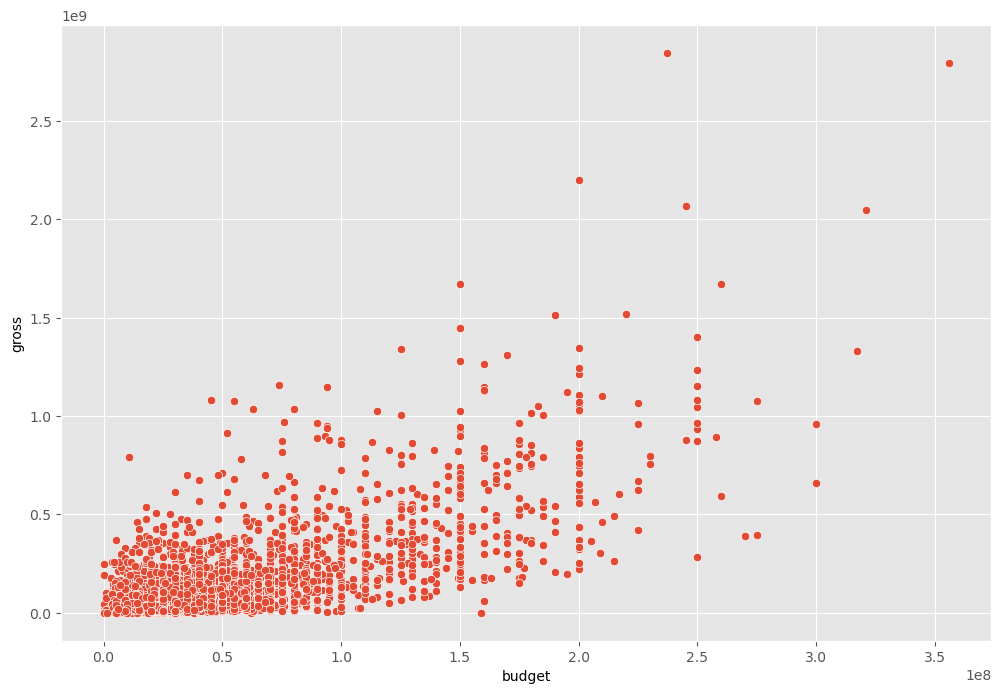

In [62]:
plt.scatter(x=df['gross'],y=df['budget'])
plt.title('Budget vs Gross earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for film')
plt.show()


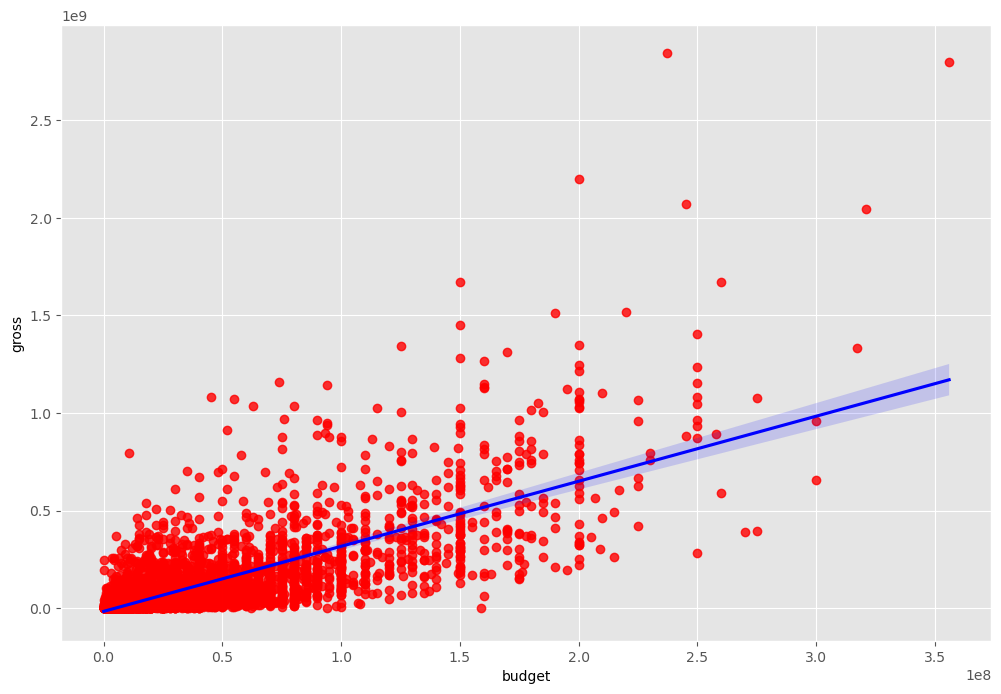

In [65]:
sns.regplot(x='budget', y='gross', data=df,scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

In [66]:
df.corr()

/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_3523/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_3523/4090464115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


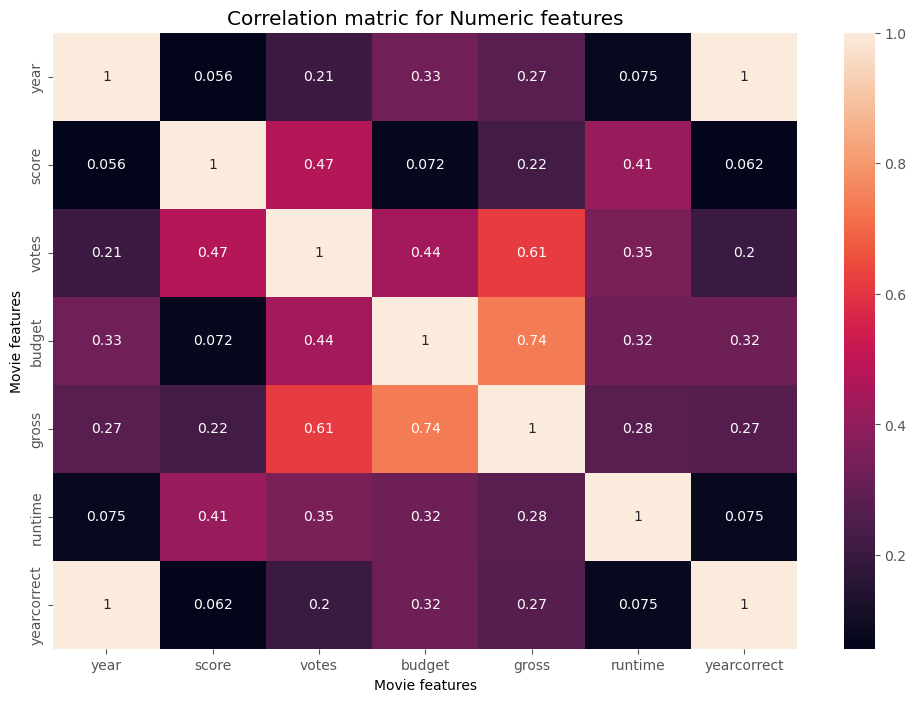

In [69]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation matric for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [72]:
# converting none-numeric metrics to the numberic to be able to see all the correlations
df_numerised=df

for col in df_numerised.columns:
    if df_numerised[col].dtype=='object' :
        df_numerised[col]= df_numerised[col].astype('category')
        df_numerised[col]= df_numerised[col].cat.codes
            
     
    
    
    
df_numerised           

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   
7480  4388       4      2  2019      1126    6.9   222000.0      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000.0       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000.0      1060    1646   
6646  1541       5      0  2015       165    7.1   370000.0       809     481   
7494  1530       4      2  2019      2053    6.8   148000.0       277    1383   
6644   387       5      0  2015      1712    7.3   777000.0      1060    1646   
7247   567       5      0  2018       723    7.3   661000.0      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000.0       452    2862   
7075  3644       5      0  2017       500    7.0   581000.0      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000.0       764     777   
6262  1529       4      2  2013      2082    7.4   585000.0       277    1383   
7072   477       4      7  2017      1561    7.1   283000.0       155    2822   
7281  1966       4      2  2018      1325    7.6   263000.0       193     327   
7055  4119       5      0  2017        45    6.6   214000.0       567    1013   
6244  2014       5      0  2013      1881    7.1   779000.0      1767     837   
6688  2545       4      2  2015      1050    6.4   218000.0      1144     362   
6846   750       5      0  2016      1910    7.8   694000.0       105     513   
7250   343       5      0  2018       565    6.9   404000.0       809     699   
4245  4407       5      0  2003       516    8.9  1700000.0      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000.0      1019     479   
7456   755       5      0  2019      1697    6.8   478000.0        96     182   
5878  4950       5      0  2011      1442    6.2   390000.0      1302     886   
6059  3498       5      0  2012      2148    7.7   642000.0      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000.0      1302     886   
2448  4388       1      2  1994      1394    8.5   970000.0      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000.0       317    1606   
7463  3640       5      0  2019       553    6.5   394000.0       768     489   
7450  2091       6      5  2019      2321    8.4  1000000.0      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000.0      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000.0      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000.0       674    2927   
6869  3260       5      0  2016       509    7.8   572000.0       615     492   
7481   206       4      1  2019      1837    6.9   239000.0       705    1468   
5860  2988       5      0  2011      1803    6.6   492000.0      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000.0      1144     524   
2245  2115       5      0  1993      1292    8.1   894000.0      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000.0        81     153   
3451  3637       4      0  1999      1778    6.5   748000.0       653    1046   
5667   215       4      1  2010      1679    6.4   392000.0      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000.0       239     390   
6045  4240       5      1  2012       492    7.8   773000.0      1520     967   
3843  1736       4      1  2001      1987    7.6   685000.0       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000.0       317    1606   
6311  1101       4      2  2013      

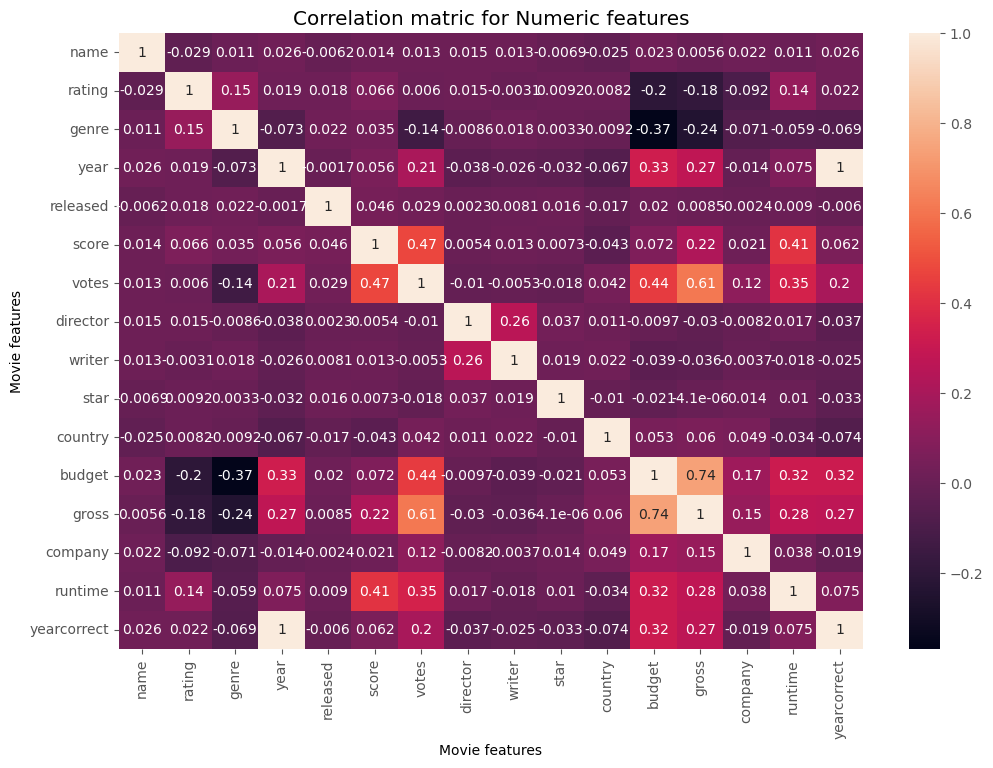

In [73]:
# check the correlation between metrics
sns.heatmap(df_numerised.corr(), annot=True)
plt.title('Correlation matric for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [78]:
# Unstack and sort the data 
Sorted_pairs=df_numerised.corr().unstack().sort_values()
Sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [81]:
#  Filter all the data with high correlation
    filtered_pairs=Sorted_pairs[(Sorted_pairs)>0.5]
filtered_pairs

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64